In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Function to parse the metadata and time series data
def parse_gps_data(file_path):
    metadata = {}
    time_series = []

    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            if line.startswith("#"):
                # Extracting the velocity components
                if "VN :" in line:
                    metadata['VN'] = float(line.split(':')[1].split()[0])
                elif "VE :" in line:
                    metadata['VE'] = float(line.split(':')[1].split()[0])
                elif "VU :" in line:
                    metadata['VU'] = float(line.split(':')[1].split()[0])
            else:
                # Read the time series data
                columns = line.split()
                if len(columns) == 7:
                    year = float(columns[0])
                    dn = float(columns[1])
                    de = float(columns[2])
                    du = float(columns[3])
                    sdn= float(columns[4])
                    sde= float(columns[5])
                    sdu= float(columns[6])
                    time_series.append([year, dn, de, du, sdn, sde, sdu])

    return metadata, pd.DataFrame(time_series, columns=['Year', 'DN', 'DE', 'DU', 'SDN', 'SDE', 'SDU'])

# Path to the data file
file_path = 'iisc_gps_data.txt'

# Parse the data
metadata, time_series = parse_gps_data(file_path)

# Display the parsed metadata and time series data
#print(metadata)
print(time_series.head())



        Year      DN      DE      DU     SDN     SDE     SDU
0  2000.0014 -0.3793 -0.4565 -0.0048  0.0024  0.0036  0.0096
1  2000.0041 -0.3779 -0.4564 -0.0021  0.0021  0.0028  0.0082
2  2000.0068 -0.3751 -0.4529  0.0033  0.0020  0.0026  0.0084
3  2000.0096 -0.3761 -0.4557  0.0009  0.0020  0.0025  0.0088
4  2000.0123 -0.3764 -0.4542  0.0038  0.0021  0.0025  0.0089


In [4]:
# Save the time series data to a CSV file
time_series.to_csv('time_series_data.csv', index=False)


In [5]:
print(time_series.describe())

              Year           DN           DE          DU          SDN  \
count  6322.000000  6322.000000  6322.000000  6322.00000  6322.000000   
mean   2011.173707     0.020967     0.028180     0.00055     0.002060   
std       5.809376     0.205452     0.253179     0.00784     0.000341   
min    2000.001400    -0.379300    -0.459800    -0.02600     0.001200   
25%    2006.163700    -0.158300    -0.184800    -0.00480     0.001800   
50%    2011.287650     0.027400     0.033050     0.00060     0.002000   
75%    2016.153700     0.195325     0.243575     0.00580     0.002300   
max    2020.995900     0.369300     0.453900     0.02570     0.003200   

               SDE          SDU  
count  6322.000000  6322.000000  
mean      0.002580     0.007792  
std       0.000496     0.001785  
min       0.001400     0.003800  
25%       0.002200     0.006400  
50%       0.002500     0.007500  
75%       0.002900     0.008900  
max       0.004900     0.014800  


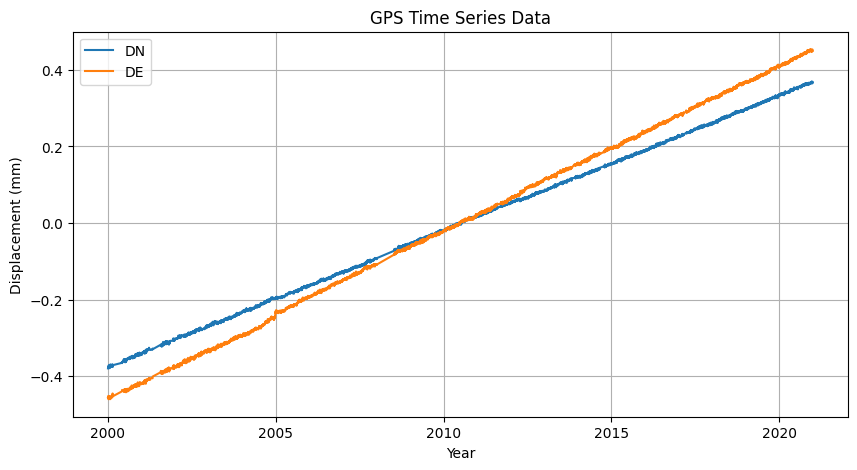

In [6]:
#Plot of the North and East components of the GPS time series data with respect to time
plt.figure(figsize=(10, 5))
plt.plot(time_series['Year'], time_series['DN'], label='DN')
plt.plot(time_series['Year'], time_series['DE'], label='DE')
plt.xlabel('Year')
plt.ylabel('Displacement (mm)')
plt.title('GPS Time Series Data')
plt.legend()
plt.grid()
plt.show()


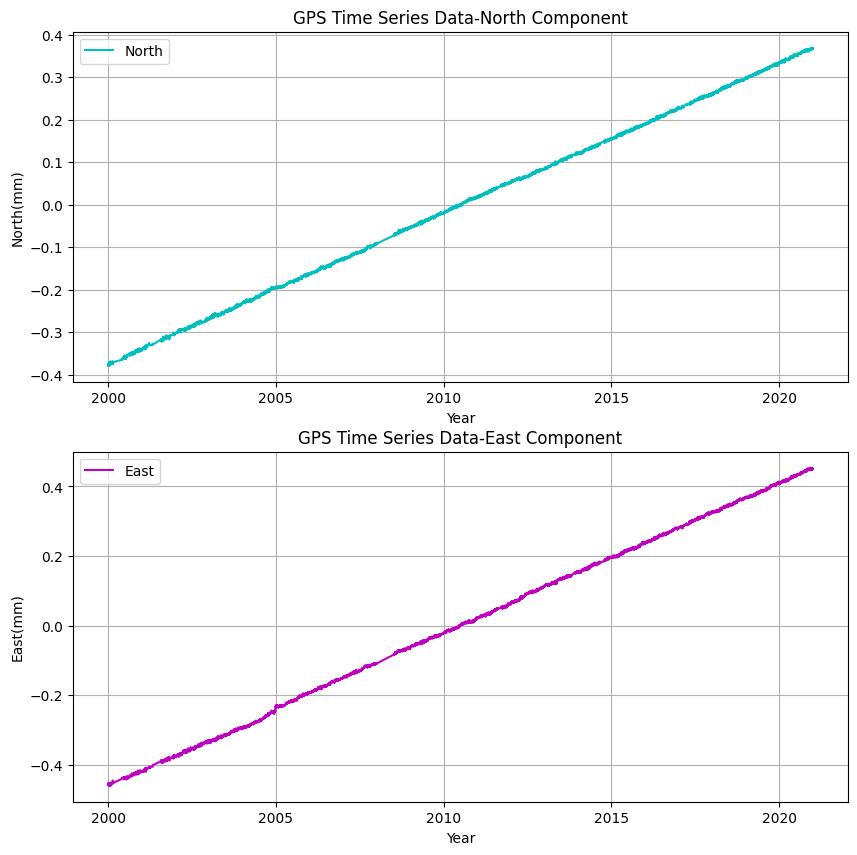

In [7]:
fig, ax = plt.subplots(2, figsize=(10, 10))

# Plotting the North component of the gps data with respect to time
ax[0].plot(time_series['Year'], time_series['DN'], label='North', color="c")
ax[0].set_xlabel('Year')
ax[0].set_ylabel('North(mm)')
ax[0].set_title('GPS Time Series Data-North Component')
ax[0].legend(loc='upper left')
ax[0].grid()

# Plotting the East component of the gps data with respect to time
ax[1].plot(time_series['Year'], time_series['DE'], color="m",label='East')
ax[1].set_xlabel("Year")
ax[1].set_ylabel('East(mm)')
ax[1].set_title('GPS Time Series Data-East Component')
ax[1].legend()
ax[1].grid()

plt.show()

Now we have to calculate the Long term rate of the North and East component of the GPS data
And after that We can calculate the Total rate of movement of the statiuon using this formula:
Total rate=sqrt{(N-S rate)^2+(E-W rate)^2}


In [8]:
#Calculation of the long term rate in the north comonent of the GPS data
#For this first we have to do the polyfit of the required curve for which we want to calcualte thhe long term rate


#Here we are doing the linear fit for the north component of the GPS data

coefficients = np.polyfit(time_series['Year'], time_series['DN'], 1)

# The first element of the returned array is the slope, which is the long term rate
long_term_rate = coefficients[0]

print(f"The long term rate for the north component is {long_term_rate} mm/year")

The long term rate for the north component is 0.03536318654878764 mm/year


In [9]:
# Define the years you're interested in
years = [2000, 2005, 2010, 2015]

for year in years:
    # Get the rows for the current year
    rows = time_series.loc[time_series['Year'] == year, 'DN']

    if not rows.empty:
        # If there are any rows for the current year, print the 'DN' value
        north_value = rows.values[0]
        print(f"The North y-component for the year {year} is {north_value} mm")
    else:
        print(f"There is no data for the year {year}.")

There is no data for the year 2000.
There is no data for the year 2005.
There is no data for the year 2010.
There is no data for the year 2015.
